# Compare Result Equity 

## Import Library

In [392]:
import sys
sys.path.append('../../')

In [393]:
import datetime as dt
from dateutil.relativedelta import relativedelta
import os
import pandas as pd
# import pandas_datareader as pdr
import numpy as np
import quantstats as qs
from config.constants import *
from util.plot_equity import plot_equity_trades
import matplotlib.pyplot as plt
from util.load_data import load_data

## Load result strategy

In [394]:
strategy = {}

### Data XAUUSD

In [395]:
XAUUSD = load_data()

In [396]:
XAUUSD['D1_IS'] = XAUUSD['D1'].loc['2007': '2019'].copy()
XAUUSD['H4_IS'] = XAUUSD['H4'].loc['2007': '2019'].copy()
XAUUSD['H1_IS'] = XAUUSD['H1'].loc['2007': '2019'].copy()
XAUUSD['M30_IS'] = XAUUSD['M30'].loc['2007': '2019'].copy()

In [397]:
XAUUSD['D1_OOS'] = XAUUSD['D1'].loc['2020': '2023'].copy()
XAUUSD['H4_OOS'] = XAUUSD['H4'].loc['2020': '2023'].copy()
XAUUSD['H1_OOS'] = XAUUSD['H1'].loc['2020': '2023'].copy()
XAUUSD['M30_OOS'] = XAUUSD['M30'].loc['2020': '2023'].copy()

### Buy and Hold

In [398]:
benchmark = {}

In [399]:
benchmark['D1'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_D1.csv', index_col='Time', parse_dates=True)
benchmark['H4'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H4.csv', index_col='Time', parse_dates=True)
benchmark['H1'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H1.csv', index_col='Time', parse_dates=True)
benchmark['M30'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_M30.csv', index_col='Time', parse_dates=True)

In [400]:
benchmark['D1_IS'] = benchmark['D1'].loc['2007':'2019'].copy()
benchmark['H4_IS'] = benchmark['H4'].loc['2007':'2019'].copy()
benchmark['H1_IS'] = benchmark['H1'].loc['2007':'2019'].copy()
benchmark['M30_IS'] = benchmark['M30'].loc['2007':'2019'].copy()

In [401]:
benchmark['D1_OOS'] = benchmark['D1'].loc['2020':'2023'].copy()
benchmark['H4_OOS'] = benchmark['H4'].loc['2020':'2023'].copy()
benchmark['H1_OOS'] = benchmark['H1'].loc['2020':'2023'].copy()
benchmark['M30_OOS'] = benchmark['M30'].loc['2020':'2023'].copy()

In [402]:
strategy['Buy and Hold'] = benchmark

###  Linear Regression

In [403]:
Linear_Regression = {}
folder = 'Linear Regression'
Main_folder = 'Machine_Learning'
Sub_folder = 'Backtest'

In [404]:
Linear_Regression['D1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_In_Sample.csv', index_col='Time', parse_dates=True)
Linear_Regression['H4_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_In_Sample.csv', index_col='Time', parse_dates=True)
Linear_Regression['H1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_In_Sample.csv', index_col='Time', parse_dates=True)
Linear_Regression['M30_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_In_Sample.csv', index_col='Time', parse_dates=True)

In [405]:
Linear_Regression['D1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_Out_Sample.csv', index_col='Time', parse_dates=True)
Linear_Regression['H4_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_Out_Sample.csv', index_col='Time', parse_dates=True)
Linear_Regression['H1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_Out_Sample.csv', index_col='Time', parse_dates=True)
Linear_Regression['M30_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_Out_Sample.csv', index_col='Time', parse_dates=True)

In [406]:
strategy['Linear Regression'] = Linear_Regression

###  Logistic Regression

In [407]:
Logistic_Regression = {}
folder = 'Logistic Regression'
Main_folder = 'Machine_Learning'
Sub_folder = 'Backtest'

In [408]:
Logistic_Regression['D1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_In_Sample.csv', index_col='Time', parse_dates=True)
Logistic_Regression['H4_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_In_Sample.csv', index_col='Time', parse_dates=True)
Logistic_Regression['H1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_In_Sample.csv', index_col='Time', parse_dates=True)
Logistic_Regression['M30_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_In_Sample.csv', index_col='Time', parse_dates=True)

In [409]:
Logistic_Regression['D1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_Out_Sample.csv', index_col='Time', parse_dates=True)
Logistic_Regression['H4_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_Out_Sample.csv', index_col='Time', parse_dates=True)
Logistic_Regression['H1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_Out_Sample.csv', index_col='Time', parse_dates=True)
Logistic_Regression['M30_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_Out_Sample.csv', index_col='Time', parse_dates=True)

In [410]:
strategy['Logistic Regression'] = Logistic_Regression

###  Mutiple Linear Regression

In [411]:
Mutiple_Linear_Regression = {}
folder = 'Mutiple_Linear_Regression'
Main_folder = 'Machine_Learning'
Sub_folder = 'Backtest'

In [412]:
Mutiple_Linear_Regression['D1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_In_Sample.csv', index_col='Time', parse_dates=True)
Mutiple_Linear_Regression['H4_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_In_Sample.csv', index_col='Time', parse_dates=True)
Mutiple_Linear_Regression['H1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_In_Sample.csv', index_col='Time', parse_dates=True)
Mutiple_Linear_Regression['M30_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_In_Sample.csv', index_col='Time', parse_dates=True)

In [413]:
Mutiple_Linear_Regression['D1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_Out_Sample.csv', index_col='Time', parse_dates=True)
Mutiple_Linear_Regression['H4_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_Out_Sample.csv', index_col='Time', parse_dates=True)
Mutiple_Linear_Regression['H1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_Out_Sample.csv', index_col='Time', parse_dates=True)
Mutiple_Linear_Regression['M30_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_Out_Sample.csv', index_col='Time', parse_dates=True)

In [414]:
strategy['Mutiple Linear Regression'] = Mutiple_Linear_Regression

###  Random Forest Classifier

In [415]:
Random_Forest_Classifier = {}
folder = 'Random Forest Classifier'
Main_folder = 'Machine_Learning'
Sub_folder = 'Backtest'

In [416]:
Random_Forest_Classifier['D1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_In_Sample.csv', index_col='Time', parse_dates=True)
Random_Forest_Classifier['H4_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_In_Sample.csv', index_col='Time', parse_dates=True)
Random_Forest_Classifier['H1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_In_Sample.csv', index_col='Time', parse_dates=True)
Random_Forest_Classifier['M30_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_In_Sample.csv', index_col='Time', parse_dates=True)

In [417]:
Random_Forest_Classifier['D1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_Out_Sample.csv', index_col='Time', parse_dates=True)
Random_Forest_Classifier['H4_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_Out_Sample.csv', index_col='Time', parse_dates=True)
Random_Forest_Classifier['H1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_Out_Sample.csv', index_col='Time', parse_dates=True)
Random_Forest_Classifier['M30_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_Out_Sample.csv', index_col='Time', parse_dates=True)

In [418]:
strategy['Random Forest Classifier'] = Random_Forest_Classifier

###  Support Vector Classifier

In [419]:
Support_Vector_Classifier = {}
folder = 'Support Vector Classifier'
Main_folder = 'Machine_Learning'
Sub_folder = 'Backtest'

In [420]:
Support_Vector_Classifier['D1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_In_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Classifier['H4_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_In_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Classifier['H1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_In_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Classifier['M30_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_In_Sample.csv', index_col='Time', parse_dates=True)

In [421]:
Support_Vector_Classifier['D1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_Out_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Classifier['H4_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_Out_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Classifier['H1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_Out_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Classifier['M30_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_Out_Sample.csv', index_col='Time', parse_dates=True)

In [422]:
strategy['Support Vector Classifier'] = Support_Vector_Classifier

###  Support Vector Regression

In [423]:
Support_Vector_Regression = {}
folder = 'Support Vector Regression'
Main_folder = 'Machine_Learning'
Sub_folder = 'Backtest'

In [424]:
Support_Vector_Regression['D1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_In_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Regression['H4_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_In_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Regression['H1_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_In_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Regression['M30_IS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_In_Sample.csv', index_col='Time', parse_dates=True)

In [425]:
Support_Vector_Regression['D1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_D1_Out_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Regression['H4_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H4_Out_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Regression['H1_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_H1_Out_Sample.csv', index_col='Time', parse_dates=True)
Support_Vector_Regression['M30_OOS'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/result_M30_Out_Sample.csv', index_col='Time', parse_dates=True)

In [426]:
strategy['Support Vector Regression'] = Support_Vector_Regression

## Shown Result

### TF D1

In [427]:
TF = 'D1'

#### IS

In [428]:
TF_IS = f'{TF}_IS'

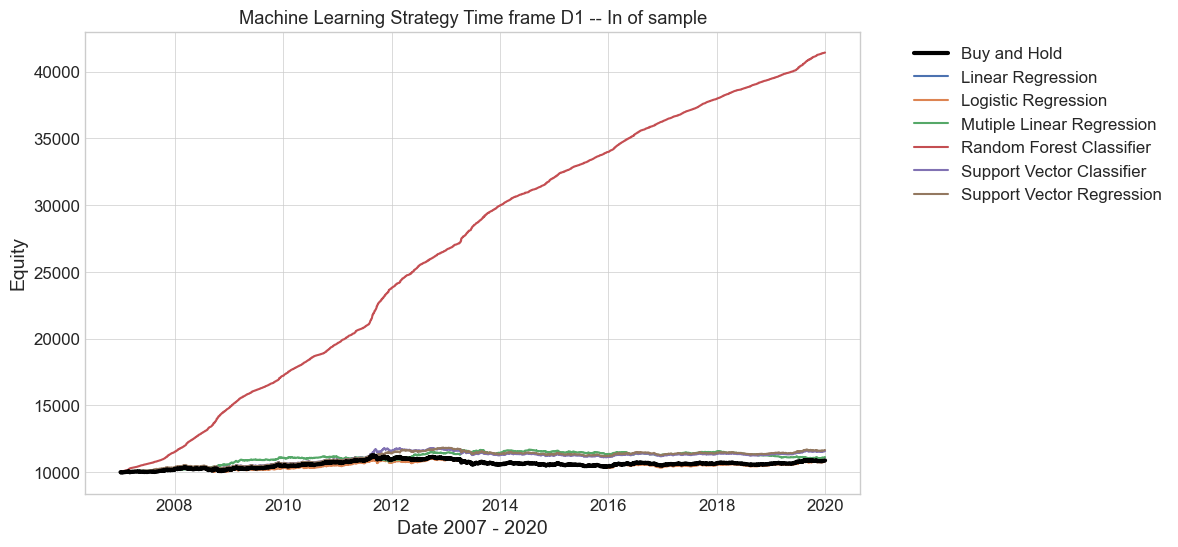

In [429]:
# XAUUSD[TF_IS] = XAUUSD[TF_IS].reindex(
#     Linear_Regression[TF_IS].index, method='ffill')  # fill forward

# benchmark[TF_IS] = benchmark[TF_IS].reindex(
#     Linear_Regression[TF_IS].index, method='ffill')  # fill forward

x = XAUUSD[TF_IS].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF_IS]['Equity']

        if data == 'Buy and Hold':

            plt.plot(x, y, label=f'{data}',


                     color='black', linewidth=3, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Machine Learning Strategy Time frame {TF} -- In of sample')

    plt.xlabel('Date 2007 - 2020', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### OOS

In [430]:
TF_OOS = f'{TF}_OOS'

skip Buy and Hold


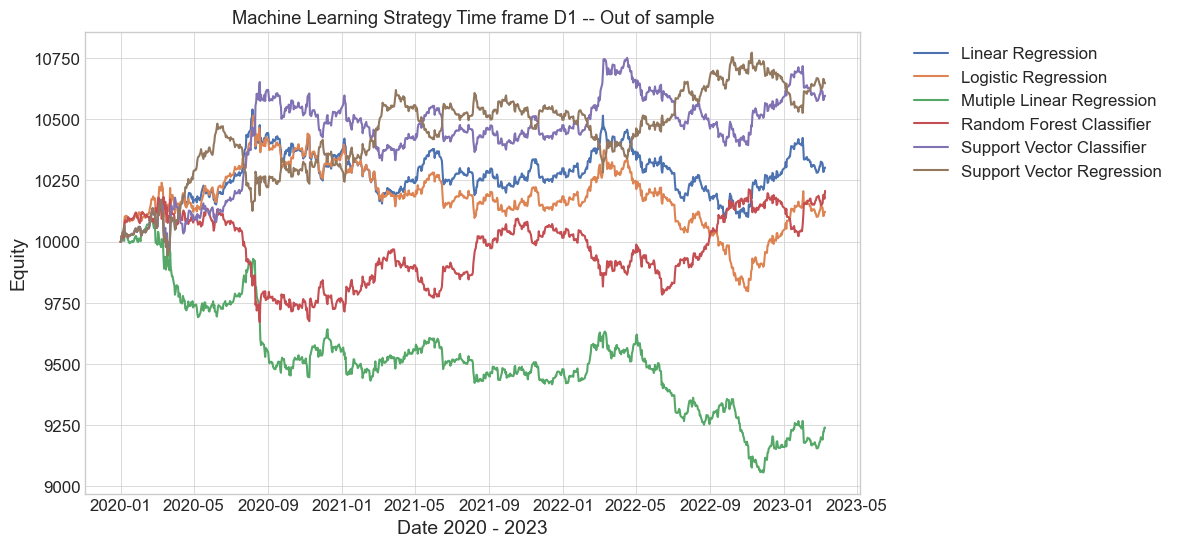

In [431]:
# XAUUSD[TF_OOS] = XAUUSD[TF_OOS].reindex(
#     Linear_Regression[TF_OOS].index, method='ffill')  # fill forward

# benchmark[TF_OOS] = benchmark[TF_OOS].reindex(
#     Linear_Regression[TF_OOS].index, method='ffill')  # fill forward

x = XAUUSD[TF_OOS].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF_OOS]['Equity']

        if data == 'Buy and Hold':
            print('skip Buy and Hold')
            # plt.plot(x, y, label=f'{data}', color='black', linewidth=3, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Machine Learning Strategy Time frame {TF} -- Out of sample')

    plt.xlabel('Date 2020 - 2023', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### TF H4

In [432]:
TF = 'H4'

#### IS

In [433]:
TF_IS = f'{TF}_IS'

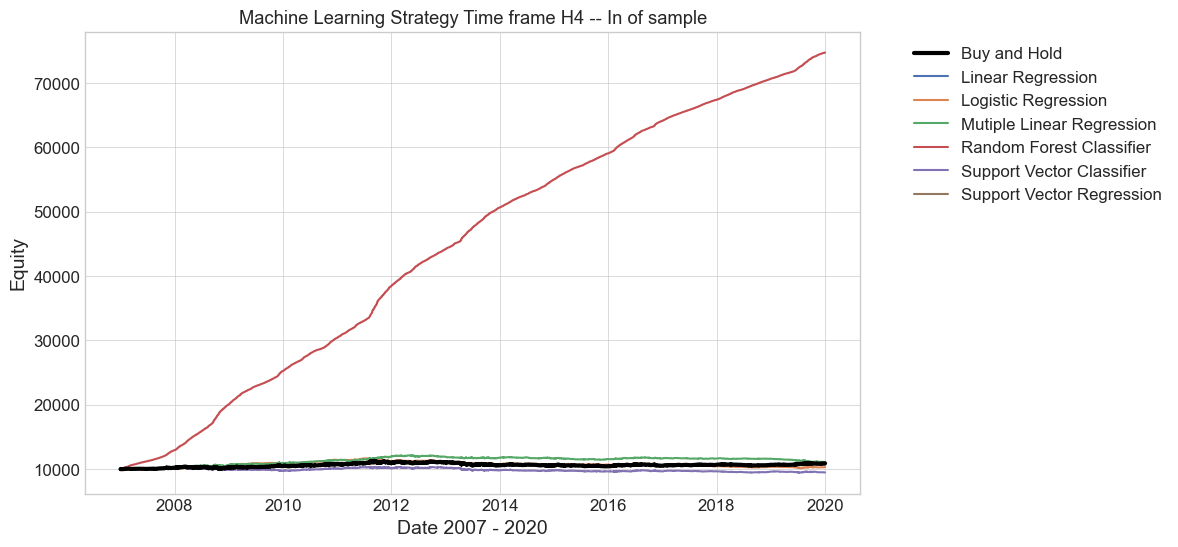

In [434]:
# XAUUSD[TF_IS] = XAUUSD[TF_IS].reindex(
#     Linear_Regression[TF_IS].index, method='ffill')  # fill forward

# benchmark[TF_IS] = benchmark[TF_IS].reindex(
#     Linear_Regression[TF_IS].index, method='ffill')  # fill forward

x = XAUUSD[TF_IS].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF_IS]['Equity']

        if data == 'Buy and Hold':

            plt.plot(x, y, label=f'{data}',


                     color='black', linewidth=3, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Machine Learning Strategy Time frame {TF} -- In of sample')

    plt.xlabel('Date 2007 - 2020', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### OOS

In [435]:
TF_OOS = f'{TF}_OOS'

skip Buy and Hold


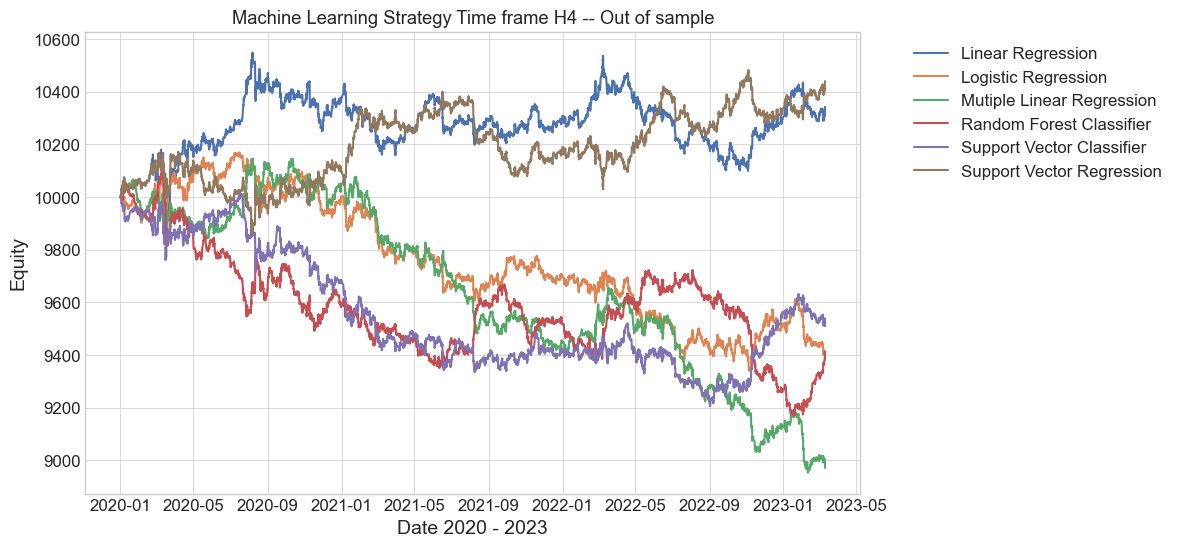

In [436]:
# XAUUSD[TF_OOS] = XAUUSD[TF_OOS].reindex(
#     Linear_Regression[TF_OOS].index, method='ffill')  # fill forward

# benchmark[TF_OOS] = benchmark[TF_OOS].reindex(
#     Linear_Regression[TF_OOS].index, method='ffill')  # fill forward

x = XAUUSD[TF_OOS].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF_OOS]['Equity']

        if data == 'Buy and Hold':
            print('skip Buy and Hold')
            # plt.plot(x, y, label=f'{data}', color='black', linewidth=3, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Machine Learning Strategy Time frame {TF} -- Out of sample')

    plt.xlabel('Date 2020 - 2023', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### TF H1

In [437]:
TF = 'H1'

#### IS

In [438]:
TF_IS = f'{TF}_IS'

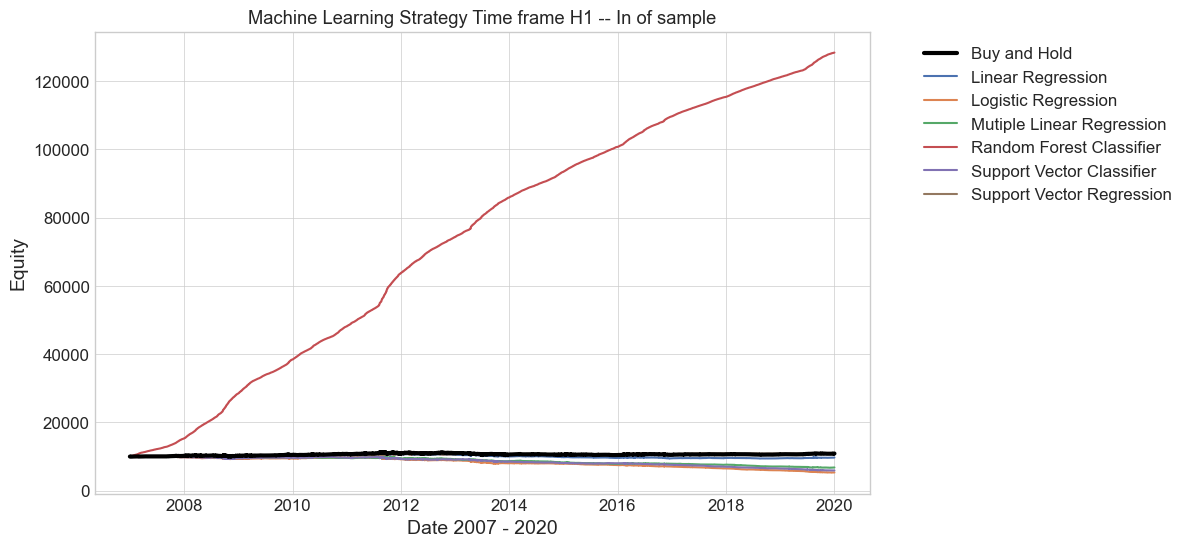

In [439]:
# XAUUSD[TF_IS] = XAUUSD[TF_IS].reindex(
#     Linear_Regression[TF_IS].index, method='ffill')  # fill forward

# benchmark[TF_IS] = benchmark[TF_IS].reindex(
#     Linear_Regression[TF_IS].index, method='ffill')  # fill forward

x = XAUUSD[TF_IS].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF_IS]['Equity']

        if data == 'Buy and Hold':

            plt.plot(x, y, label=f'{data}',


                     color='black', linewidth=3, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Machine Learning Strategy Time frame {TF} -- In of sample')

    plt.xlabel('Date 2007 - 2020', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### OOS

In [440]:
TF_OOS = f'{TF}_OOS'

skip Buy and Hold


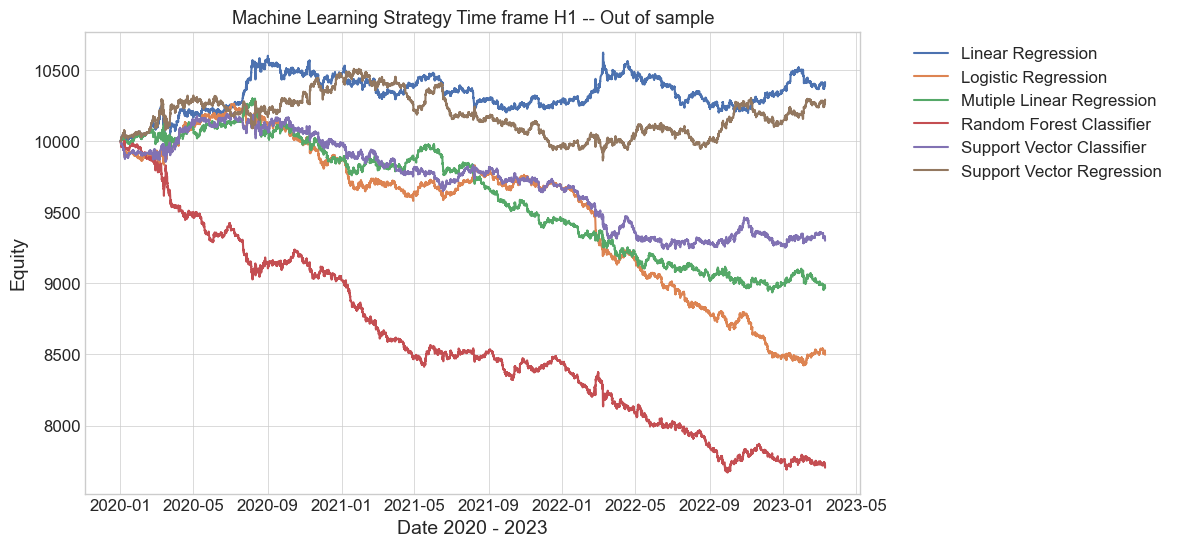

In [441]:
# XAUUSD[TF_OOS] = XAUUSD[TF_OOS].reindex(
#     Linear_Regression[TF_OOS].index, method='ffill')  # fill forward

# benchmark[TF_OOS] = benchmark[TF_OOS].reindex(
#     Linear_Regression[TF_OOS].index, method='ffill')  # fill forward

x = XAUUSD[TF_OOS].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF_OOS]['Equity']

        if data == 'Buy and Hold':
            print('skip Buy and Hold')
            # plt.plot(x, y, label=f'{data}', color='black', linewidth=3, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Machine Learning Strategy Time frame {TF} -- Out of sample')

    plt.xlabel('Date 2020 - 2023', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### TF M30

In [442]:
TF = 'M30'

#### IS

In [443]:
TF_IS = f'{TF}_IS'

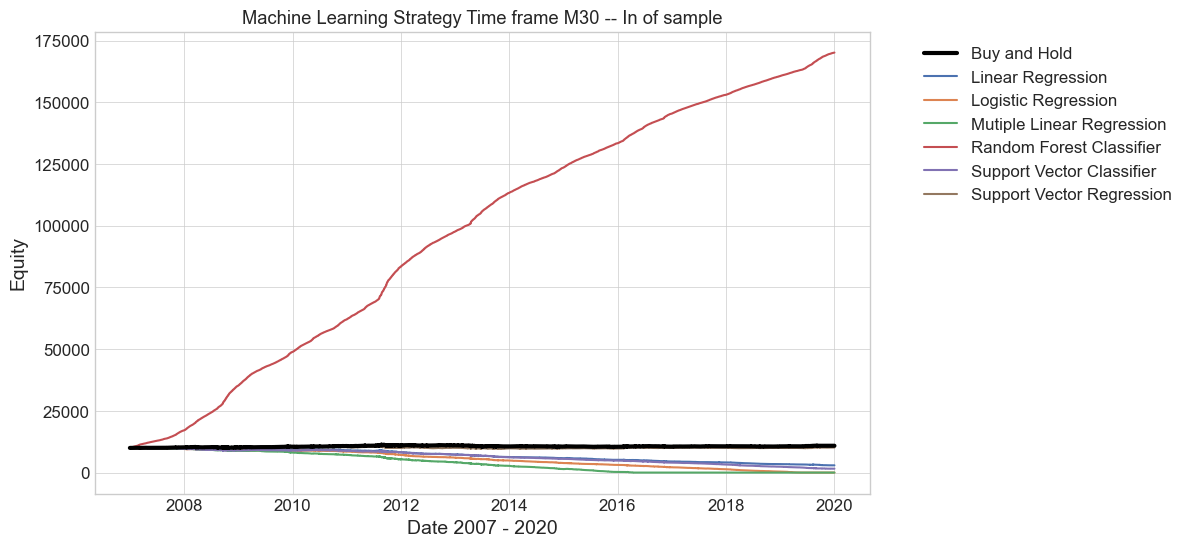

In [444]:
# XAUUSD[TF_IS] = XAUUSD[TF_IS].reindex(
#     Linear_Regression[TF_IS].index, method='ffill')  # fill forward

# benchmark[TF_IS] = benchmark[TF_IS].reindex(
#     Linear_Regression[TF_IS].index, method='ffill')  # fill forward

x = XAUUSD[TF_IS].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF_IS]['Equity']

        if data == 'Buy and Hold':

            plt.plot(x, y, label=f'{data}',


                     color='black', linewidth=3, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Machine Learning Strategy Time frame {TF} -- In of sample')

    plt.xlabel('Date 2007 - 2020', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### OOS

In [445]:
TF_OOS = f'{TF}_OOS'

skip Buy and Hold


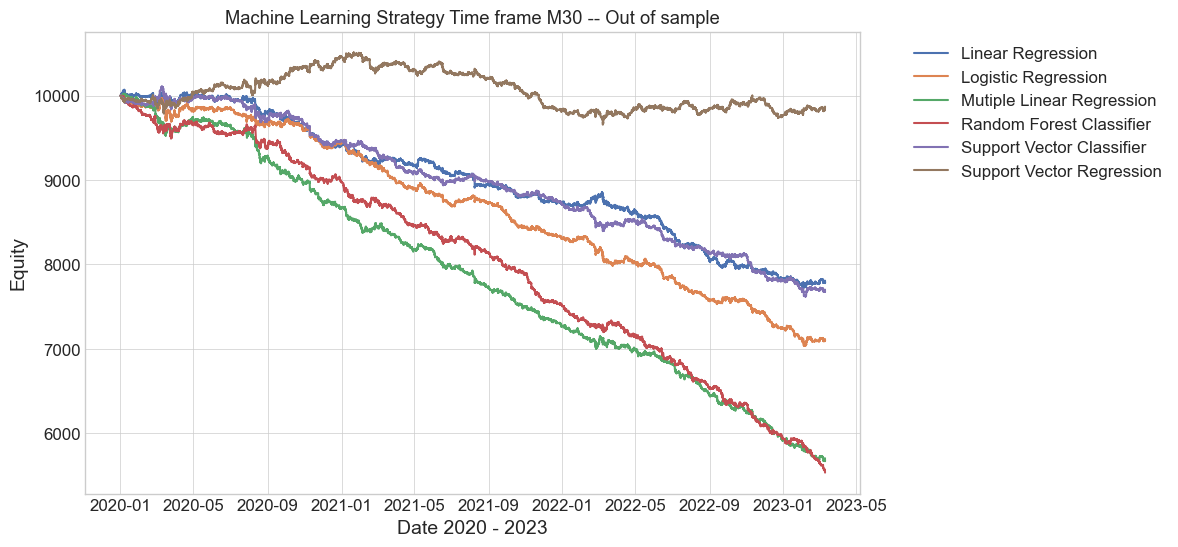

In [450]:
# XAUUSD[TF_OOS] = XAUUSD[TF_OOS].reindex(
#     Linear_Regression[TF_OOS].index, method='ffill')  # fill forward

# benchmark[TF_OOS] = benchmark[TF_OOS].reindex(
#     Linear_Regression[TF_OOS].index, method='ffill')  # fill forward

x = XAUUSD[TF_OOS].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF_OOS]['Equity']

        if data == 'Buy and Hold':
            print('skip Buy and Hold')
            # plt.plot(x, y, label=f'{data}', color='black', linewidth=3, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Machine Learning Strategy Time frame {TF} -- Out of sample')

    plt.xlabel('Date 2020 - 2023', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()